In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Payal Kumari\Downloads\mymoviedb.csv")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [121]:
df['Genre'].head()


0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [122]:
df.duplicated().sum()

np.int64(0)

In [123]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [124]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)
df['Release_Date']=df['Release_Date'].dt.year
df.head()

datetime64[ns]


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [125]:
#dropping unnecessary columns
col=['Overview','Original_Language','Poster_Url']
df.drop(col,inplace=True,axis=1)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [126]:
def categorize_col(df, col, labels):
    # ensure numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]

    df[col] = pd.cut(
        df[col],
        bins=edges,
        labels=labels,
        include_lowest=True,
        duplicates='drop'
    )
    return df


In [127]:
labels = ['not_popular','below_average','average','Very_popular']
categorize_col(df,'Vote_Average',labels)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,Very_popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,Very_popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,below_average,Thriller
3,2021.0,Encanto,2402.201,5076,Very_popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [128]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2567
Very_popular     2450
average          2411
below_average    2398
Name: count, dtype: int64

In [129]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [130]:
#split generes into  a list and then explode our  dataframe to have only one genere per row for eeach movie
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,Very_popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,Very_popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,Very_popular,Science Fiction
3,2022.0,The Batman,3827.658,1151,Very_popular,Crime
4,2022.0,The Batman,3827.658,1151,Very_popular,Mystery


In [131]:
#casting column into category
df['Genre']=df['Genre'].astype("category")
df['Release_Date']=df['Release_Date'].astype("int32")  
df['Genre'].dtypes



CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [132]:
df.nunique()
df.dtypes

Release_Date       int32
Title             object
Popularity       float64
Vote_Count        object
Vote_Average    category
Genre           category
dtype: object

In [133]:
#data visualization
sns.set_style('whitegrid')

In [134]:
#Q1.what is the most frequent genre of movies released on netflix?
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

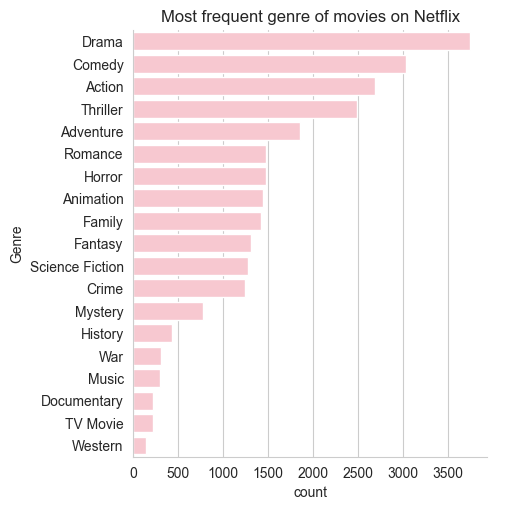

In [135]:
sns.catplot(y='Genre',kind='count',data=df,order=df['Genre'].value_counts().index,color='pink')
plt.title('Most frequent genre of movies on Netflix')
plt.show()

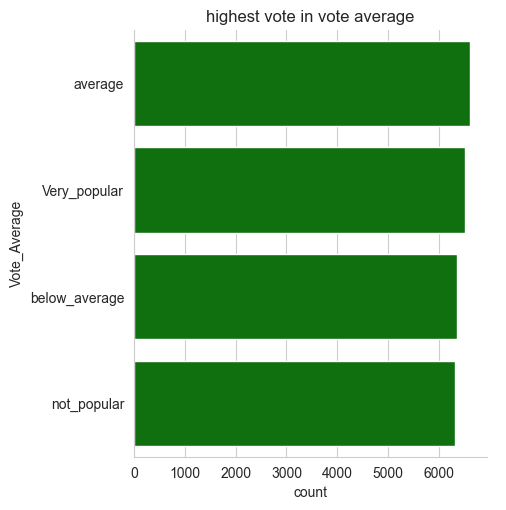

In [136]:
#which has higghest vote in vote avg column
sns.set_style("whitegrid")
sns.catplot(y='Vote_Average',kind='count',data=df,order=df['Vote_Average'].value_counts().index,color='green')
plt.title('highest vote in vote average')
plt.show()

In [137]:
#Q3. what movie got  th highest popularity?whats its genre??
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Very_popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Very_popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Very_popular,Science Fiction


In [138]:
#Q4. what movie got  th lowest popularity?whats its genre??
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984,Threads,13.354,186,Very_popular,War
25790,1984,Threads,13.354,186,Very_popular,Drama
25791,1984,Threads,13.354,186,Very_popular,Science Fiction


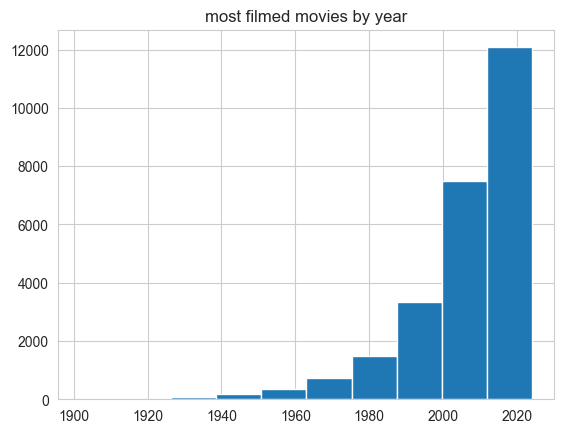

In [139]:
#Q5. which year has the most filmed movies??
df['Release_Date'].hist()
plt.title('most filmed movies by year')
plt.show()

                                                          CONCLUSION 


Q1. what is the most frequent genre of movies released on netflix?
Ans- Drama is the most frequent genre in our dataset and has appeared more tahn 14%of the times among 19 other genres 


Q2. What genre has highest votes?
Ans- we have 25.5% of our dataset with popular vote (6520 rows).Drama again gets the highest popularity amomng fans by being having more than 18.5% of movies popularities


Q3. What movie got the highest popularity ? what's its genre?
Ans- Spider man :No way home has the highest popularity ratev in our dataset and it has genres of Action,Adventure, and science fiction


Q4. What movie got the lowest popularity? whjats its genre The united states ,thread' has the highest lowest rate i our dataset and itbhas genres of music,drama,war,science-fiction and history


Q5. which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset

